In [99]:
#Importamos la librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import modules from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as arbol

In [100]:
df = pd.read_csv('../../datasetsGrandes/spotifySongs/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [101]:
#Separamos en X e y
X = df.drop("popularity", axis=1) #Elimino de mi dataset la variable a predecir
y = df.popularity #Defino el Target
X.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)

In [102]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [103]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [104]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [105]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [106]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.0765237295151825
% de aciertos sobre el set de evaluación: 0.07536277996840945


In [107]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[13264     0     0 ...     0     0     0]
 [ 3557     0     0 ...     0     0     0]
 [ 2920     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    2     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


/Users/nicolasfernandez/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


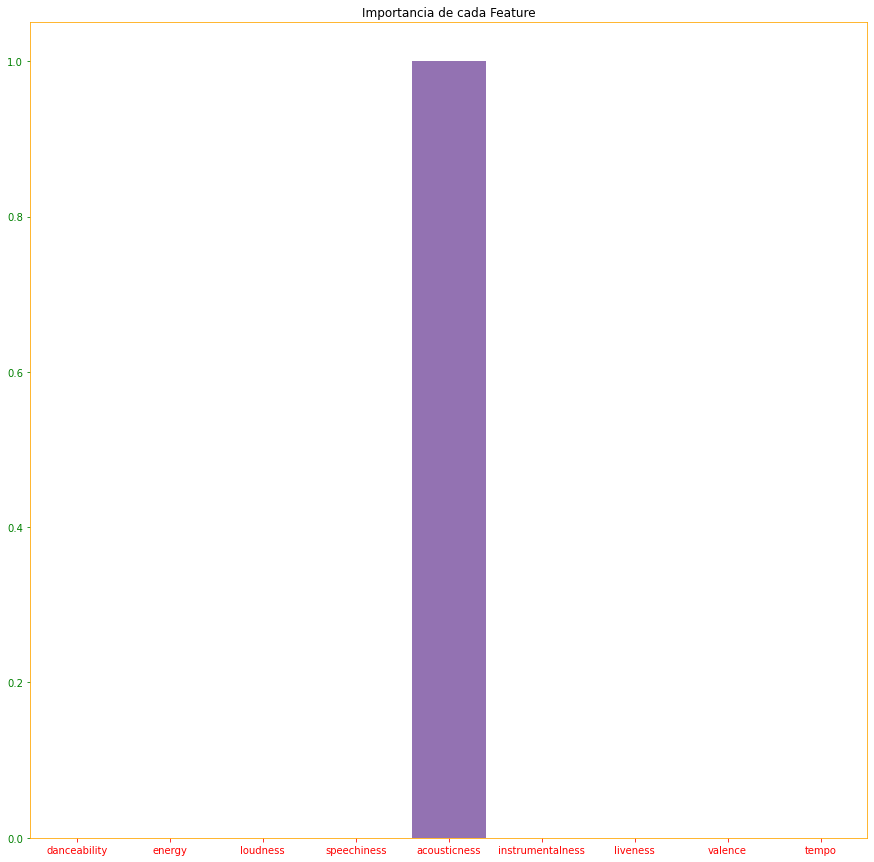

In [124]:
#Importancia de las variables
import matplotlib.pyplot as plt
import seaborn as sns

with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    plt.figure(figsize=(15,15))
    importances = tree.feature_importances_
    columns = X.columns
    sns.barplot(columns, importances)
    plt.title('Importancia de cada Feature')
    plt.show()

7% de acierto porque mi target tiene muchas posibles soluciones, de 0 a 100. Vamos a categorizarlo

In [109]:
def categorize(row):
    if row['popularity'] < 30:
        val = "low"
    elif row['popularity'] < 70:
        val = "medium"
    else:
        val = "high"
    return val

df['popularityCategorical'] = df.apply(categorize, axis=1)
df.drop(['popularity'], axis=1, inplace=True)

In [110]:
#Separamos en X e y
X2 = df.drop("popularityCategorical", axis=1) #Elimino de mi dataset la variable a predecir
y2 = df.popularityCategorical #Defino el Target
X2.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)

In [111]:
X2.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [112]:
y2.head()

0    low
1    low
2    low
3    low
4    low
Name: popularityCategorical, dtype: object

In [113]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42)
tree2 = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree2.fit(X_train2,y_train2)
y_train_pred2 = tree2.predict(X_train2)
y_test_pred2 = tree2.predict(X_test2)
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)
test_accuracy2 = accuracy_score(y_test2, y_test_pred2)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy2)
print('% de aciertos sobre el set de evaluación:',test_accuracy2)

% de aciertos sobre el set de entrenamiento: 0.6468088733045998
% de aciertos sobre el set de evaluación: 0.6465267440142726


Aumentamos de 7% a 65% reduciendo a 3 posibles outputs: Low, medium, high

In [114]:
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y_test2, y_test_pred2)
print('Matriz de Confusión:')
print(matriz2)

Matriz de Confusión:
[[    0   519  1706]
 [    0 72341 23602]
 [    0 36385 41449]]


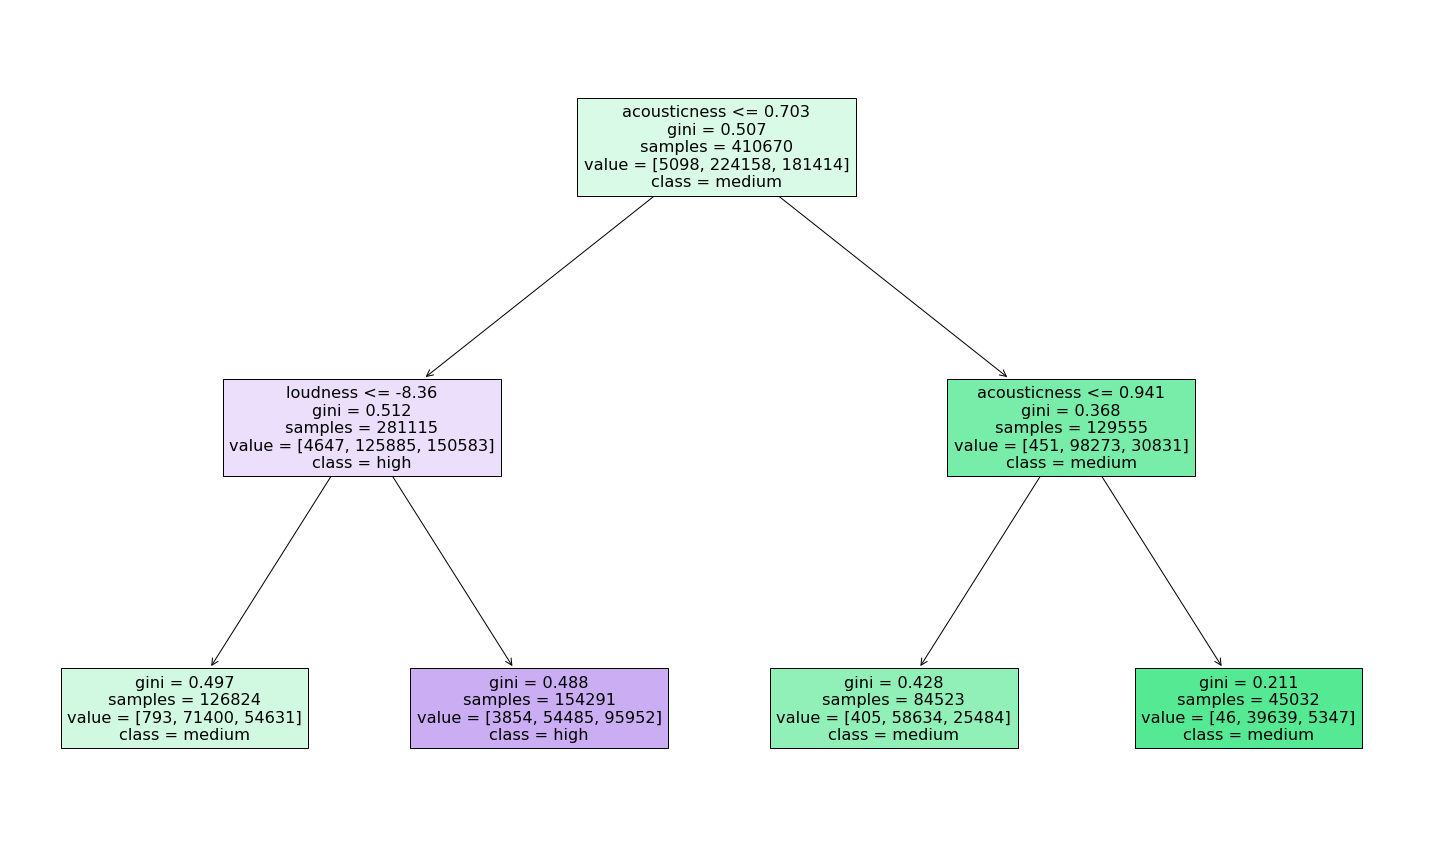

In [115]:
plt.figure(figsize=(20,12))
arbol.plot_tree(tree2, feature_names= X_train2.columns, max_depth=5, class_names=['low', 'medium', 'high'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [116]:
print(arbol.export_text(tree2, feature_names = X_train2.columns.tolist()))

|--- acousticness <= 0.70
|   |--- loudness <= -8.36
|   |   |--- class: low
|   |--- loudness >  -8.36
|   |   |--- class: medium
|--- acousticness >  0.70
|   |--- acousticness <= 0.94
|   |   |--- class: low
|   |--- acousticness >  0.94
|   |   |--- class: low



Vamos a reducir una cardinalidad más popularity para ver como evoluciona el % de aciertos y demás

In [117]:
def categorizeMore(row):
    if row['popularityCategorical'] == "low" or row['popularityCategorical'] == "medium":
        val = "low"
    else:
        val = "high"
    return val

df['popularityCategoricalMore'] = df.apply(categorizeMore, axis=1)
df.drop(['popularityCategorical'], axis=1, inplace=True)

#Separamos en X e y
X3 = df.drop("popularityCategoricalMore", axis=1) #Elimino de mi dataset la variable a predecir
y3 = df.popularityCategoricalMore #Defino el Target
X3.drop(['duration_ms', 'mode', 'time_signature', 'explicit', 'key', 'mode', 'id', 'name', 'artists', 'id_artists', 'release_date'], axis=1, inplace=True)

In [118]:
X3.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


In [119]:
y3.head()

0    low
1    low
2    low
3    low
4    low
Name: popularityCategoricalMore, dtype: object

In [120]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=42)
tree3 = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree3.fit(X_train3,y_train3)
y_train_pred3 = tree3.predict(X_train3)
y_test_pred3 = tree3.predict(X_test3)
train_accuracy3 = accuracy_score(y_train3, y_train_pred3)
test_accuracy3 = accuracy_score(y_test3, y_test_pred3)
print('% de aciertos sobre el set de entrenamiento:', train_accuracy3)
print('% de aciertos sobre el set de evaluación:',test_accuracy3)

% de aciertos sobre el set de entrenamiento: 0.9875861397228919
% de aciertos sobre el set de evaluación: 0.9873580982034295


Subimos a un 99% casi

In [121]:
matriz3 = confusion_matrix(y_test3, y_test_pred3)
print('Matriz de Confusión:')
print(matriz3)

Matriz de Confusión:
[[     0   2225]
 [     0 173777]]


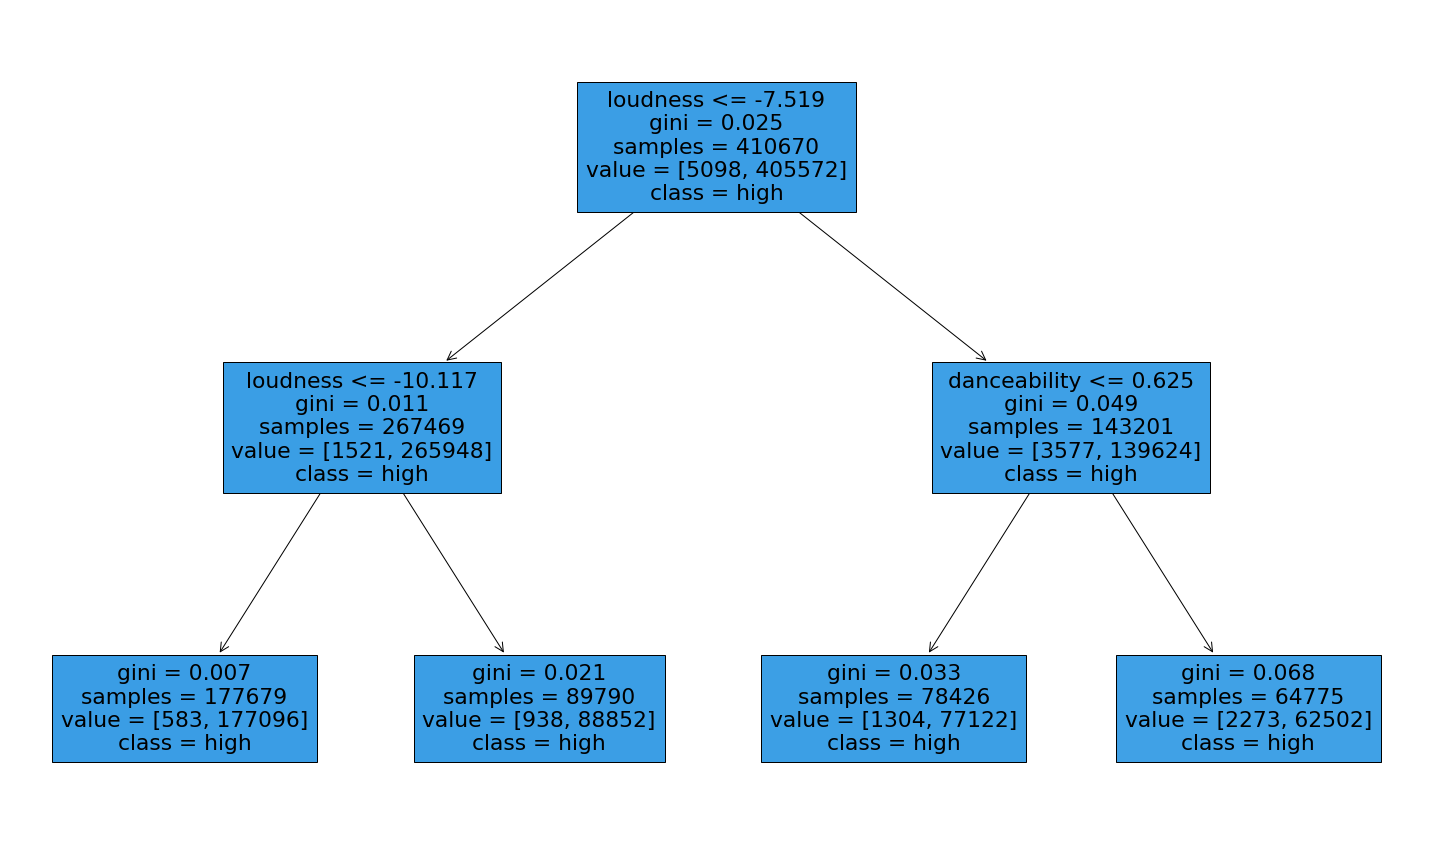

In [122]:
plt.figure(figsize=(20,12))
arbol.plot_tree(tree3, feature_names= X_train3.columns, max_depth=5, class_names=['low', 'high'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [123]:
print(arbol.export_text(tree3, feature_names = X_train3.columns.tolist()))

|--- loudness <= -7.52
|   |--- loudness <= -10.12
|   |   |--- class: low
|   |--- loudness >  -10.12
|   |   |--- class: low
|--- loudness >  -7.52
|   |--- danceability <= 0.62
|   |   |--- class: low
|   |--- danceability >  0.62
|   |   |--- class: low

